In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
dataset = pd.read_csv('data/student.csv')

In [3]:
dataset.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [4]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [6]:
math = dataset['Math'].values
read = dataset['Reading'].values
write = dataset['Writing'].values

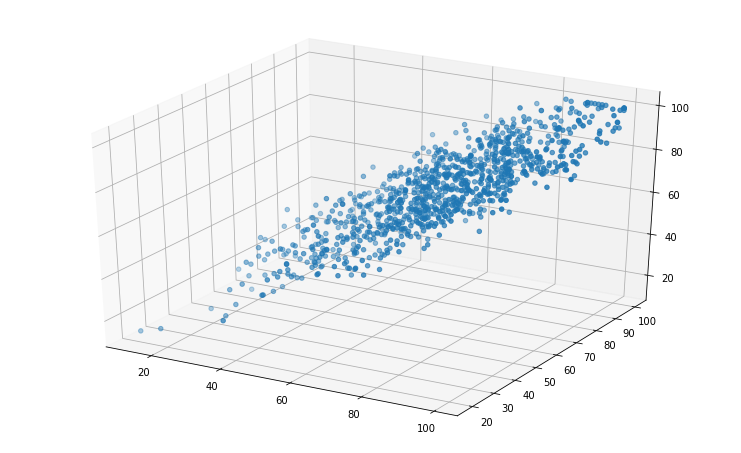

In [8]:
figure = plt.figure(figsize=(10,6))
axes = Axes3D(figure)
axes.scatter(math,read,write)

In [67]:
# number of epoch
nb_epoch = 600
# learning_rate
alpha = 0.0001
X0 = np.ones(len(math))
X = np.array([X0, math, read]).T
b = np.zeros([3])
y = np.array(write)

In [68]:
def cost_function(X,y,b):
    m = len(X)
    cost = np.sum((X.dot(b) - y)**2) / (2*m)
    return cost

In [69]:
cost_function(X,y,b)

2470.1100000000001

In [70]:
def gradient_descent(X,y,b,alpha,nb_epoch):
    cost_history = [0] * nb_epoch
    m = len(read)
    for i in range(nb_epoch):
        h = X.dot(b)
        loss = h - y
        gradient = X.T.dot(loss) / m
        b = b - alpha * gradient
        cost_history[i] = cost_function(X,y,b)
    
    return cost_history, b

In [71]:
cost, b = gradient_descent(X,y,b,alpha,nb_epoch)

In [72]:
b

array([ 0.00499897,  0.11905593,  0.86806455])

In [73]:
cost[0:10]

[18.076027940915424,
 17.130944319220845,
 17.073468283968428,
 17.016805917446867,
 16.960632022512346,
 16.904942273985981,
 16.849732499083832,
 16.794998561027846,
 16.740736358693887,
 16.686941826304441]

In [74]:
cost[-1]

10.536465995839022

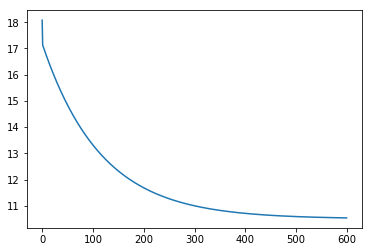

In [75]:
x = [i for i in range(600)]
plt.plot(x, cost)

In [77]:
ypred = X.dot(b)

In [78]:
ypred[0:10]

array([ 64.7480728 ,  77.69969491,  78.85558111,  81.10260698,
        62.58542979,  81.13728004,  81.25633597,  47.14866995,
        74.97644534,  77.95284349])

In [79]:
y[0:10]

array([63, 72, 78, 79, 62, 85, 83, 41, 80, 77], dtype=int64)